In [21]:
using Random
using Plots 
using LinearAlgebra
# using PyPlot

# Training data
n = 10;                          #number of training points
x = rand(Float64, n);              #predictors
y = sin.(x) + 0.05*randn(n);   #regressors

rng = MersenneTwister(1234)

MersenneTwister(1234)

In [80]:
function GenerateGaussianProcess(n,s,l;cov="Gaussian",onlycov=false)
    x = rand(rng,Float64, n)
    x = sort(x)
    m = zeros(n)
    Σ = zeros(n,n)
    for i in 1:n 
        for j in 1:n 
            if cov == "Gaussian"
                Σ[i,j] = s^2 * exp(-(x[i]-x[j])^2/l^2)
            elseif cov == "exp"
                Σ[i,j] = s^2 * exp(-abs(x[i]-x[j])/l)
            elseif cov == "Matern3/2"
                Σ[i,j] = s^2 * (1+ sqrt(6)*abs(x[i]-x[j])/l)*exp(-sqrt(6)*abs(x[i]-x[j])/l)
            elseif cov == "Matern5/2"
                Σ[i,j] = s^2 * (1+ sqrt(10)*abs(x[i]-x[j])/l + 10/3*abs(x[i]-x[j]))*exp(-sqrt(10)*abs(x[i]-x[j])/l)
            end
        end
    end
    
    if onlycov
        return Σ
    end
        
    # Ct = factorize(Σ).L
    Ct = cholesky(Σ).L
    v = randn(rng,Float64, (n,1))
    z = m + Ct*v
    return x,z
end

GenerateGaussianProcess (generic function with 3 methods)

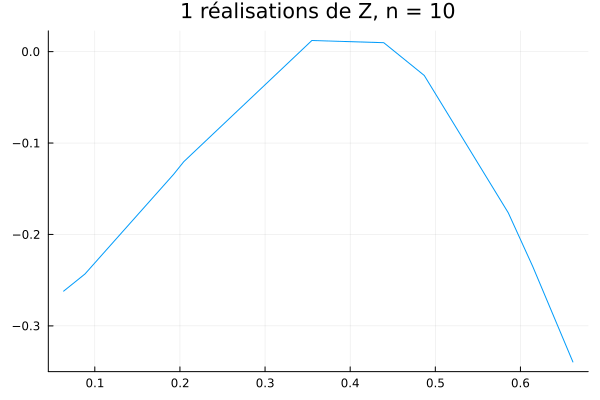

In [81]:
s = sqrt(1)
l = 0.5

plot()

for N in 1:N_real
    
    x, z = GenerateGaussianProcess(n,s,l)
    
    plot!(x,z, legend=false)
    
end


title!("$N_real réalisations de Z, n = $n")

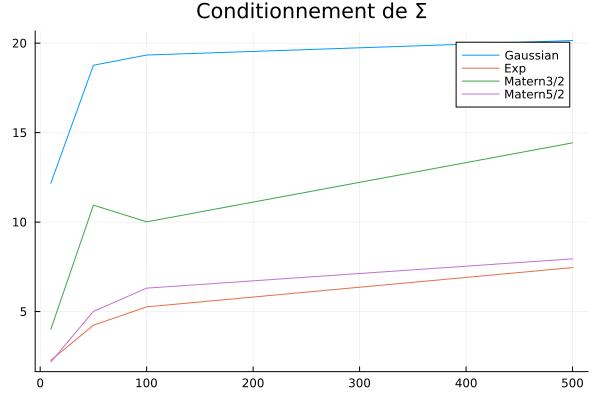

In [88]:
condsGauss = [0.0,0.0,0.0,0.0]
condsMat32 = [0.0,0.0,0.0,0.0]
condsMat52 = [0.0,0.0,0.0,0.0]
condsexp = [0.0,0.0,0.0,0.0]
ind = 1
nlist = [10,50,100,500]
for ind in 1:4
    n = nlist[ind]
    Σ = GenerateGaussianProcess(n,s,l,cov="Gaussian",onlycov=true)
    c = cond(Σ)
    lc = log10(c)
    condsGauss[ind] = lc
    Σ = GenerateGaussianProcess(n,s,l,cov="exp",onlycov=true)
    c = cond(Σ)
    lc = log10(c)
    condsexp[ind] = lc
    Σ = GenerateGaussianProcess(n,s,l,cov="Matern3/2",onlycov=true)
    c = cond(Σ)
    lc = log10(c)
    condsMat32[ind] = lc
    Σ = GenerateGaussianProcess(n,s,l,cov="Matern5/2",onlycov=true)
    c = cond(Σ)
    lc = log10(c)
    condsMat52[ind] = lc
end
plot(nlist,condsGauss,label="Gaussian")
plot!(nlist,condsexp,label="Exp")
plot!(nlist,condsMat32,label="Matern3/2")
plot!(nlist,condsMat52,label="Matern5/2")

title!("Conditionnement de Σ")

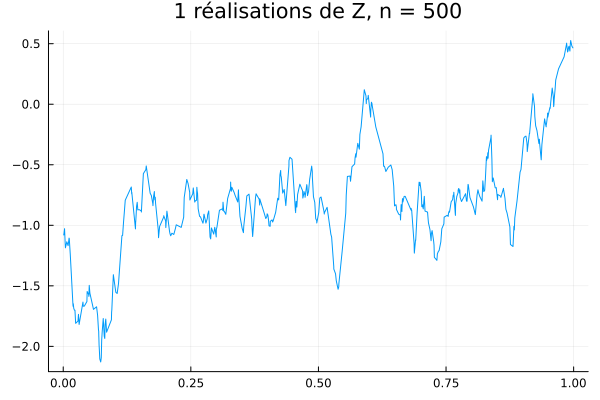

In [91]:
n = 500
N_real = 1

plot()

for N in 1:N_real
    
    x, z = GenerateGaussianProcess(n,s,l,cov="exp")
    
    plot!(x,z, legend=false)
    
end


title!("$N_real réalisations de Z, n = $n")